In [538]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Data Collection and Analysis

In [539]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [541]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Analysis

In [542]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

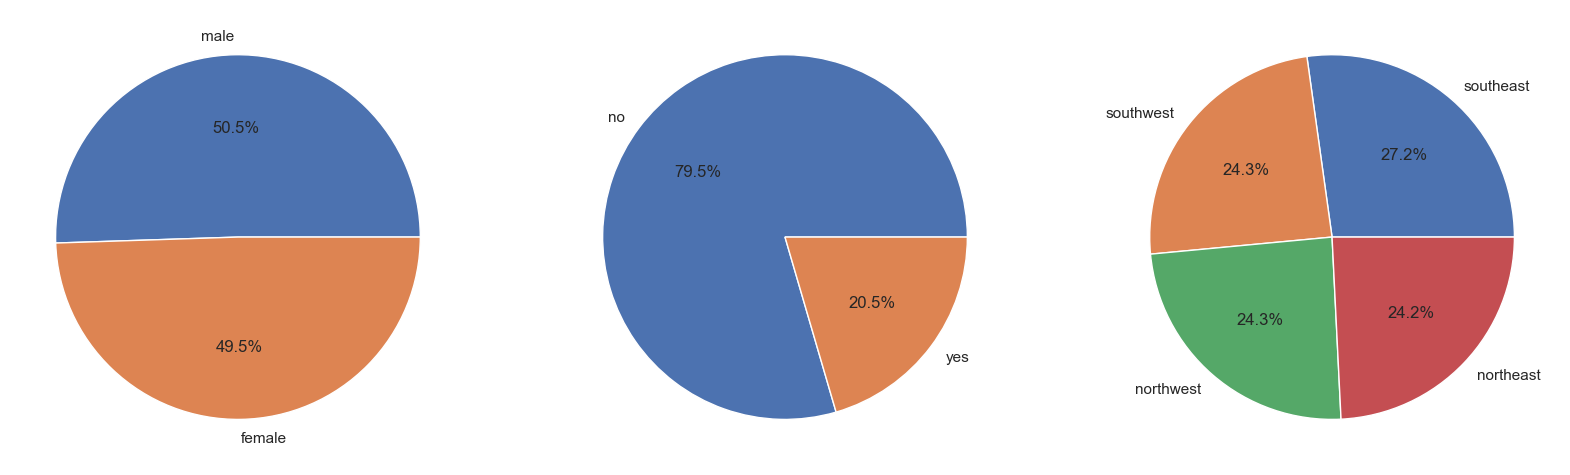

In [543]:
features = ['sex', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)
	x = df[col].value_counts()
	plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

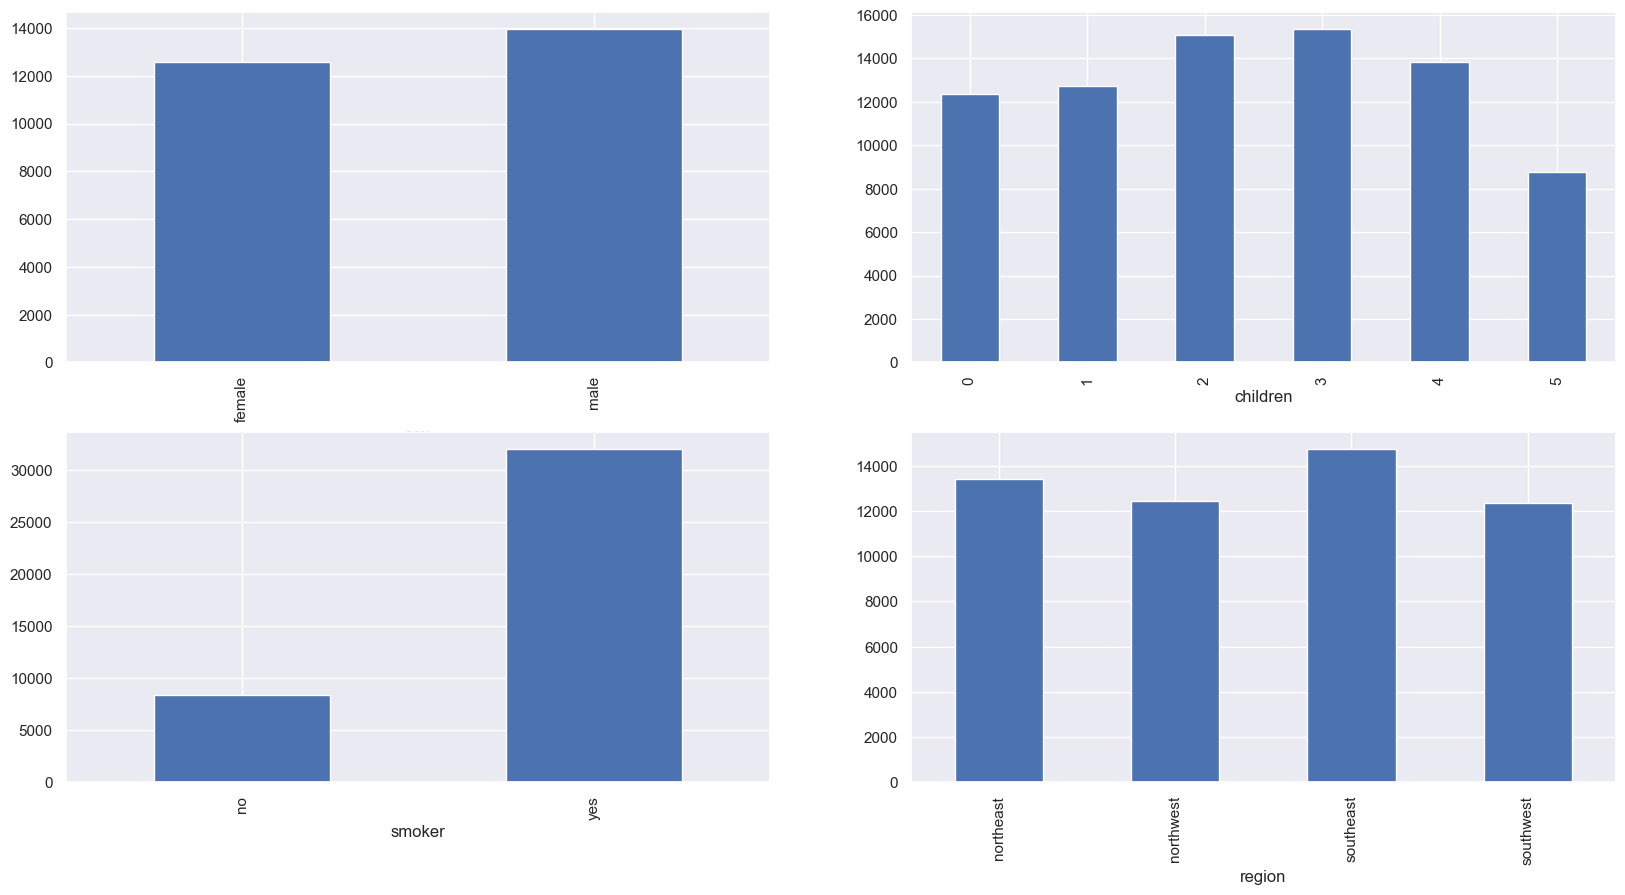

In [544]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)
	df.groupby(col).mean()['charges'].plot.bar()
plt.show()

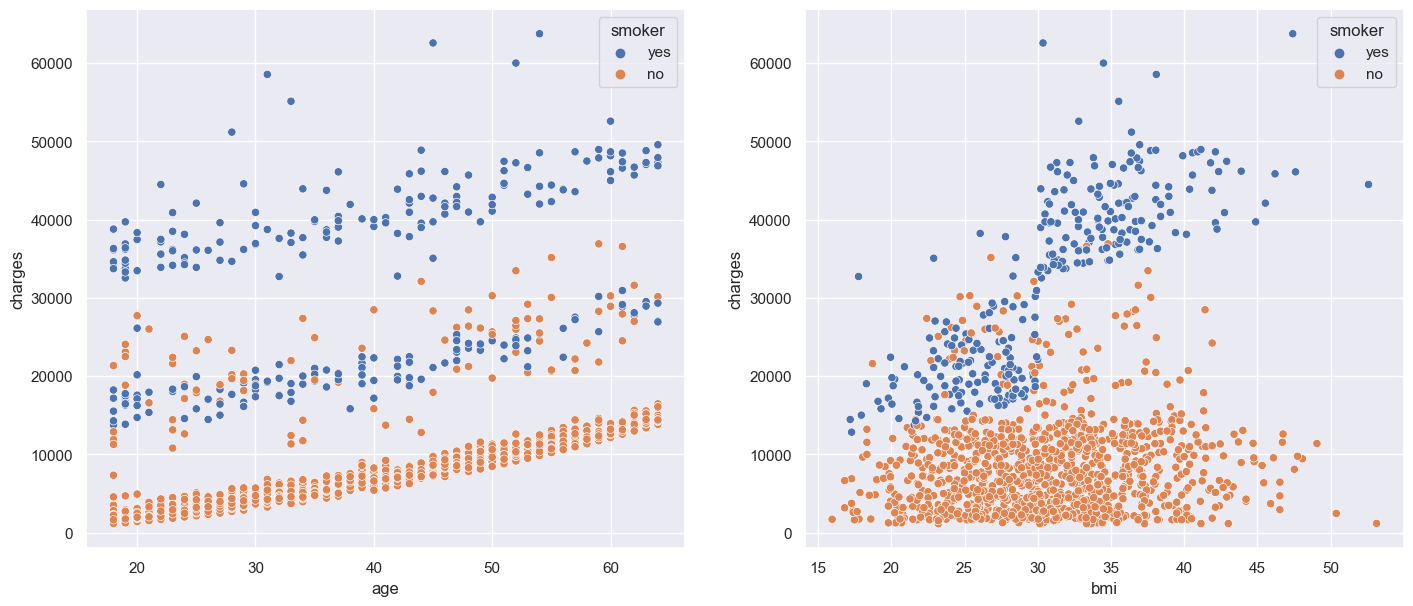

In [545]:
features = ['age', 'bmi']
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df, x=col,y='charges',hue='smoker')
plt.show()

Data Preprocessing

<Axes: >

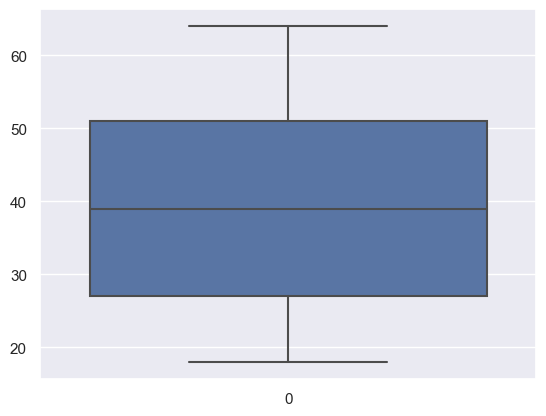

In [546]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: >

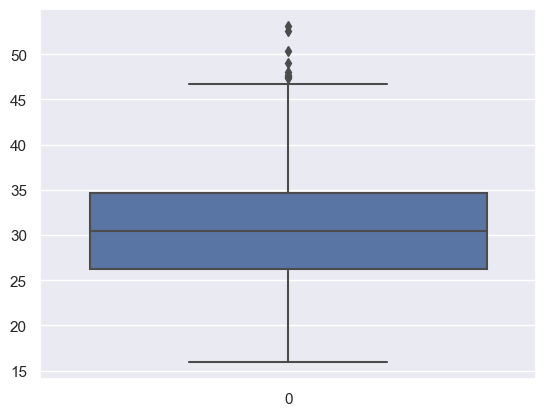

In [547]:
sns.boxplot(df['bmi'])

In [548]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


<Axes: >

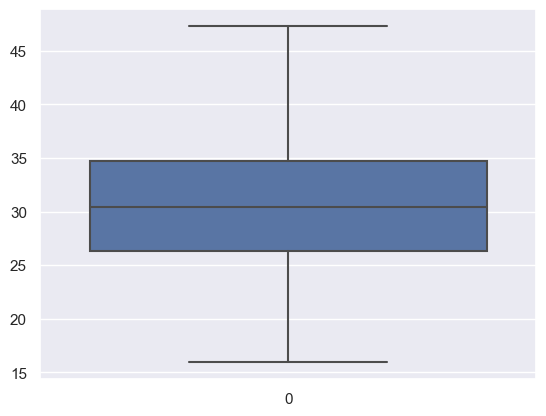

In [549]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [550]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Encoding

In [551]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [552]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


Model Development

Linear Regression:

In [553]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.741659,0.778409,0.74707
1,0.756401,0.706267,0.74707
2,0.729542,0.806239,0.74707
3,0.754260,0.732791,0.74707
4,0.742966,0.779591,0.74707
5,0.753281,0.731769,0.74707
6,0.741261,0.776456,0.74707
7,0.731940,0.796173,0.74707
8,0.751915,0.741742,0.74707
9,0.756348,0.722565,0.74707


In [554]:
xtrain

,age,sex,bmi,children,smoker,region
645,48,0,30.780,3,0,1
853,53,1,23.750,2,0,1
180,58,0,28.595,0,0,0
277,22,1,24.300,0,0,3
679,49,1,23.180,2,0,0
...,...,...,...,...,...,...
453,20,0,29.735,0,0,0
909,32,1,24.600,0,1,3
1207,36,0,33.400,2,1,3
424,48,0,30.200,2,0,3


In [555]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print("Linear Regression:")
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

Linear Regression:
0.7295415541376445
0.8062391115570589
0.7470697972809902


Support Vector Machine

In [556]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)

# Print R² scores for training and testing sets
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))

# Print mean cross-validated R² score
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())

-0.10151474302536445
-0.1344454720199666
-0.10374591327267262


Random Forest Regressor:

In [557]:
xtrain

,age,sex,bmi,children,smoker,region
1114,23,0,24.510,0,0,1
968,21,0,25.745,2,0,1
599,52,1,37.525,2,0,0
170,63,0,41.470,0,0,2
275,47,1,26.600,2,0,1
...,...,...,...,...,...,...
1096,51,1,34.960,2,1,1
1131,27,0,45.900,2,0,3
1295,20,0,22.000,1,0,3
861,38,1,28.000,3,0,3


In [558]:
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain, ytrain)
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)
print("RandomForestRegressor:")
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))
print(cross_val_score(rfmodel, X, Y, cv=5).mean())

# GridSearchCV for Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [10, 40, 50, 98, 100, 120, 150]}
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print(grid.best_params_)

# Model Evaluation with Tuned Hyperparameters:
rfmodel = RandomForestRegressor(random_state=42, n_estimators=120)
rfmodel.fit(xtrain, ytrain)
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))
print(cross_val_score(rfmodel, X, Y, cv=5).mean())

RandomForestRegressor:
0.9738163260247533
0.8819423353068565
0.8363637309718952
{'n_estimators': 120}
0.9746383984429655
0.8822009842175969
0.8367438097052858


Gradient Boosting Regressor:

In [559]:
xtrain

,age,sex,bmi,children,smoker,region
1114,23,0,24.510,0,0,1
968,21,0,25.745,2,0,1
599,52,1,37.525,2,0,0
170,63,0,41.470,0,0,2
275,47,1,26.600,2,0,1
...,...,...,...,...,...,...
1096,51,1,34.960,2,1,1
1131,27,0,45.900,2,0,3
1295,20,0,22.000,1,0,3
861,38,1,28.000,3,0,3


In [560]:
gbmodel = GradientBoostingRegressor()
gbmodel.fit(xtrain, ytrain)
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)
print("GradientBoostingRegressor:")
print(r2_score(ytrain, ypredtrain3))
print(r2_score(ytest, ypredtest3))
print(cross_val_score(gbmodel, X, Y, cv=5).mean())

# GridSearchCV for Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingRegressor()
param_grid = {'n_estimators': [10, 15, 19, 20, 21, 50], 'learning_rate': [0.1, 0.19, 0.2, 0.21, 0.8, 1]}
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print(grid.best_params_)

# Model Evaluation with Tuned Hyperparameters:
gbmodel = GradientBoostingRegressor(n_estimators=19, learning_rate=0.2)
gbmodel.fit(xtrain, ytrain)
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain3))
print(r2_score(ytest, ypredtest3))
print(cross_val_score(gbmodel, X, Y, cv=5).mean())

GradientBoostingRegressor:
0.8931345821166041
0.9042739889103126
0.8548080300711485
{'learning_rate': 0.2, 'n_estimators': 19}
0.8682397447116927
0.9017109716082661
0.8606041910125791


XGBRegressor:

In [561]:
xtrain

,age,sex,bmi,children,smoker,region
1114,23,0,24.510,0,0,1
968,21,0,25.745,2,0,1
599,52,1,37.525,2,0,0
170,63,0,41.470,0,0,2
275,47,1,26.600,2,0,1
...,...,...,...,...,...,...
1096,51,1,34.960,2,1,1
1131,27,0,45.900,2,0,3
1295,20,0,22.000,1,0,3
861,38,1,28.000,3,0,3


In [562]:
xgmodel = XGBRegressor()
xgmodel.fit(xtrain, ytrain)
ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)
print("XGBRegressor:")
print(r2_score(ytrain, ypredtrain4))
print(r2_score(ytest, ypredtest4))
print(cross_val_score(xgmodel, X, Y, cv=5).mean())

# GridSearchCV for Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
estimator = XGBRegressor()
param_grid = {'n_estimators': [10, 15, 20, 40, 50], 'max_depth': [3, 4, 5], 'gamma': [0, 0.15, 0.3, 0.5, 1]}
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print(grid.best_params_)

# Model Evaluation with Tuned Hyperparameters:
xgmodel = XGBRegressor(n_estimators=15, max_depth=3, gamma=0)
xgmodel.fit(xtrain, ytrain)
ypredtrain4 = xgmodel.predict(xtrain)
ypredtest4 = xgmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain4))
print(r2_score(ytest, ypredtest4))
print(cross_val_score(xgmodel, X, Y, cv=5).mean())

XGBRegressor:
0.9954123497078247
0.8548937785039912
0.808125309217053
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8693173313051628
0.9022460881213404
0.8607115291219747


In [563]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.038633
sex,0.000000
bmi,0.133449
children,0.011073
smoker,0.809626
region,0.007219


In [564]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
age,0.038633
bmi,0.133449
children,0.011073
smoker,0.809626


In [565]:
df.drop(df[['sex','region']], axis=1, inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)

# Split the data into training and testing sets
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)

# Initialize and train the XGBRegressor model
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
# Make predictions on the training and testing sets
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)

# Evaluate the model
print("R² Score on Training Set:", r2_score(ytrain, ypredtrain4))
print("R² Score on Testing Set:", r2_score(ytest, ypredtest4))

# Calculate and print the mean cross-validated score
cvs = cross_val_score(finalmodel, X, Y, cv=5).mean()
print("Cross-Validated Score:", cvs)

R² Score on Training Set: 0.869105118970057
R² Score on Testing Set: 0.9007425513499979
Cross-Validated Score: 0.8606266871712276


In [566]:
xtrain

,age,bmi,children,smoker
1114,23,24.510,0,0
968,21,25.745,2,0
599,52,37.525,2,0
170,63,41.470,0,0
275,47,26.600,2,0
...,...,...,...,...
1096,51,34.960,2,1
1131,27,45.900,2,0
1295,20,22.000,1,0
861,38,28.000,3,0


In [567]:
# Define the input data
input_data = [19, 1, 27.900, 0, 1, 3]

# Create a DataFrame with the input data
input_df = pd.DataFrame([input_data], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

# Select the relevant 4 features used during training
input_selected_features = input_df[['age', 'bmi', 'children', 'smoker']]

# Make predictions on the new data
predictions = finalmodel.predict(input_selected_features)

# Display the predictions
print(predictions)
print('The insurance cost in USD ',predictions[0])

[18035.828]
The insurance cost in USD  18035.828


In [568]:
import pickle 
pickle.dump(finalmodel,open('insurancemodelf.pkl','wb'))

In [569]:
# loading the saved model
loaded_model = pickle.load(open('insurancemodelf.pkl', 'rb'))

In [570]:
# Define the input data
input_data = [19, 1, 27.900, 0, 1, 3]

# Create a DataFrame with the input data
input_df = pd.DataFrame([input_data], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

# Select the relevant 4 features used during training
input_selected_features = input_df[['age', 'bmi', 'children', 'smoker']]

# Make predictions on the new data
predictions = loaded_model.predict(input_selected_features)

# Display the predictions
print(predictions)
print('The insurance cost in USD ',predictions[0])

[18035.828]
The insurance cost in USD  18035.828
